<a href="https://colab.research.google.com/github/Alan-Hans/Challenge-Data-Scientist/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This challenge requires to predict the probability of delay of flights at Santiago de Chile Airport (SCL) using a provided dataset. This work was developed by Alan Hans Bitterlich Koning, email: Alan.bitterlich.k@gmail.com. The index of this notebook is the following: 
```
1.- Import data 
2.- EDA
3.- Models
4.- Results
5.- Comments


#1.- Import data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Alan-Hans/Challenge-Data-Scientist/main/dataset_SCL.csv'

df = pd.read_csv(url)

<ipython-input-1-b0cb3f0119c9>:9: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [2]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Description of every column
```
Fecha-I: Scheduled date and time of departure (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-I: Scheduled flight number (text)
Ori-I: Origin city code (text)
Des-I: destination city code. (text)
Emp-I: Scheduled airline code (text)
Fecha-O: Date and time of arrival (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-O: Flight operation number of the flight (text)
Ori-O: Operation origin city code (text)
Des-O: Operation destination city code (text)
Emp-O: Airline code of the operated flight (text)
DIA: Day of the month (numeric)
MES: Month of the year (numeric)
AÑO: Year (numeric)
DIANOM: Day of the week (text)
TIPOVUELO: Type of flight, I =International, N =National (text)
OPERA: Operating airline company (text)
SIGLAORI: Name city of origin (text)
SIGLADES: Destination city name (text)'



#2.- EDA

 
#Some interesting insights from this analysis: 

*   It shows that the largest number of flights in this data correspond to Grupo LATAM airlines with about 58%.
*   The Top 5 destinations are: Buenos Aires,     Antofagasta,   Lima,             
Calama and           Puerto Montt.
*   Most flights are made during the month of December and on Fridays.


 


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the first few rows of the dataset to get a sense of its structure
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# List of columns
print(df.info())

               Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    M

In [4]:
## For the purpose of this analysis, null results will be filtered out, which apparently corresponds to only 1, so it will not have a great impact and drop duplicate if there are.
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68205 non-null  object
 1   Vlo-I      68205 non-null  object
 2   Ori-I      68205 non-null  object
 3   Des-I      68205 non-null  object
 4   Emp-I      68205 non-null  object
 5   Fecha-O    68205 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68205 non-null  object
 8   Des-O      68205 non-null  object
 9   Emp-O      68205 non-null  object
 10  DIA        68205 non-null  int64 
 11  MES        68205 non-null  int64 
 12  AÑO        68205 non-null  int64 
 13  DIANOM     68205 non-null  object
 14  TIPOVUELO  68205 non-null  object
 15  OPERA      68205 non-null  object
 16  SIGLAORI   68205 non-null  object
 17  SIGLADES   68205 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [5]:
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

Fecha-I
Unique Values: 53252
2017-07-28 13:30:00    6
2017-03-19 18:00:00    6
2017-03-26 18:00:00    6
2017-12-16 13:35:00    5
2017-02-15 13:35:00    5
                      ..
2017-06-01 15:16:00    1
2017-06-02 15:16:00    1
2017-06-03 15:16:00    1
2017-06-04 15:16:00    1
2017-12-31 14:55:00    1
Name: Fecha-I, Length: 53252, dtype: int64
Vlo-I
Unique Values: 750
174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64
Ori-I
Unique Values: 1
SCEL    68205
Name: Ori-I, dtype: int64
Des-I
Unique Values: 64
SCFA    5787
SPJC    5269
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64
Emp-I
Unique Values: 30
LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1573
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      

In [6]:
# Create a new categorical column based on Column1
df['TIPOVUELO_int'] = df['TIPOVUELO'].apply(lambda x: 1 if x == 'I' else 0)

# Print the updated dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha-I        68205 non-null  object
 1   Vlo-I          68205 non-null  object
 2   Ori-I          68205 non-null  object
 3   Des-I          68205 non-null  object
 4   Emp-I          68205 non-null  object
 5   Fecha-O        68205 non-null  object
 6   Vlo-O          68205 non-null  object
 7   Ori-O          68205 non-null  object
 8   Des-O          68205 non-null  object
 9   Emp-O          68205 non-null  object
 10  DIA            68205 non-null  int64 
 11  MES            68205 non-null  int64 
 12  AÑO            68205 non-null  int64 
 13  DIANOM         68205 non-null  object
 14  TIPOVUELO      68205 non-null  object
 15  OPERA          68205 non-null  object
 16  SIGLAORI       68205 non-null  object
 17  SIGLADES       68205 non-null  object
 18  TIPOVUELO_int  68205 non-n

#Creation of feature variables

In [7]:
import pandas as pd

# Assuming your date column is called "Date-I"
# Create a datetime object from the "Date-I" column
df['Date-I'] = pd.to_datetime(df['Fecha-I'], format="%Y-%m-%d %H:%M:%S")

# Define the high season periods
high_season_periods = [
    (pd.to_datetime('12-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('03-03-2018', format="%m-%d-%Y").date()),
    (pd.to_datetime('07-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('07-31-2017', format="%m-%d-%Y").date()),
    (pd.to_datetime('09-11-2017', format="%m-%d-%Y").date(), pd.to_datetime('09-30-2017', format="%m-%d-%Y").date())
]

# Define a function to check if a date is in a high season period
def is_in_high_season(date):
    for period in high_season_periods:
        if period[0] <= date.date() <= period[1]:
            return 1
    return 0

# Apply the function to create the "high_season" column
df['high_season'] = df['Date-I'].apply(is_in_high_season)

According to general instructions, it should be considered landing and takeoff of aircraft but it is not clear according to times if it is landing or taking off, variables are reviewed and it is not possible to conclude if it is landing or taking off without an extra variable. Therefore we proceed to create the function taking into consideration that only time will be subtracted and in case the result is negative it will be consider as negative in order to enter to the predicction.

In [8]:
import pandas as pd

# Convert date columns to datetime format
df['Date-I'] = pd.to_datetime(df['Fecha-I'])
df['Date-O'] = pd.to_datetime(df['Fecha-O'])

# Handle negative values in min_diff column
# Calculate the time difference between two columns
df['min_diff'] = df.apply(lambda row: (row['Date-O'] - row['Date-I']).total_seconds() / 60 if row['Date-O'] > row['Date-I'] else (row['Date-I'] - row['Date-O']).total_seconds() / -60, axis=1)




# Add period_day column based on Date-I
df['period_day'] = df['Date-I'].apply(lambda x: 'morning' if 5 <= x.hour < 12 else ('afternoon' if 12 <= x.hour < 19 else 'night'))

# Create a function to set delay_15 column based on min_diff
def set_delay_15(x):
    if x > 15:
        return 1
    else:
        return 0

# Apply the set_delay_15 function to create delay_15 column
df['delay_15'] = df['min_diff'].apply(set_delay_15)

# Print the updated dataframe
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,TIPOVUELO_int,Date-I,high_season,Date-O,min_diff,period_day,delay_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-01 23:30:00,0,2017-01-01 23:33:00,3.0,night,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-02 23:30:00,0,2017-01-02 23:39:00,9.0,night,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-03 23:30:00,0,2017-01-03 23:39:00,9.0,night,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-04 23:30:00,0,2017-01-04 23:33:00,3.0,night,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-05 23:30:00,0,2017-01-05 23:28:00,-2.0,night,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-22 14:55:00,1,2017-12-22 15:41:00,46.0,afternoon,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-25 14:55:00,1,2017-12-25 15:11:00,16.0,afternoon,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-27 14:55:00,1,2017-12-27 15:35:00,40.0,afternoon,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-29 14:55:00,1,2017-12-29 15:08:00,13.0,afternoon,0


In [9]:
# create dictionary to map string values to integers
mapping_dict = {
    'Lunes': 0,
    'Martes': 1,
    'Miercoles': 2,
    'Jueves': 3,
    'Viernes': 4,
    'Sabado': 5,
    'Domingo': 6
}

# create new column using map method with dictionary
df['DIANOM_int'] = df['DIANOM'].map(mapping_dict)

# add 7 as a possible value (since there are 7 string values)
df['DIANOM_int'] = df['DIANOM_int'].fillna(7).astype(int)

In [10]:
# create dictionary to map string values to integers
mapping_dict = {
    'morning': 0,
    'afternoon': 1,
    'night': 2,
}

# create new column using map method with dictionary
df['period_day_int'] = df['period_day'].map(mapping_dict)

# add 7 as a possible value (since there are 7 string values)
df['period_day_int'] = df['period_day_int'].fillna(7).astype(int)

In [11]:
cat_var = ['OPERA','SIGLAORI',"SIGLADES"]
for i in cat_var:
   name = i + '_int'
   df[name] = pd.factorize(df[i])[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68205 non-null  object        
 1   Vlo-I           68205 non-null  object        
 2   Ori-I           68205 non-null  object        
 3   Des-I           68205 non-null  object        
 4   Emp-I           68205 non-null  object        
 5   Fecha-O         68205 non-null  object        
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68205 non-null  object        
 8   Des-O           68205 non-null  object        
 9   Emp-O           68205 non-null  object        
 10  DIA             68205 non-null  int64         
 11  MES             68205 non-null  int64         
 12  AÑO             68205 non-null  int64         
 13  DIANOM          68205 non-null  object        
 14  TIPOVUELO       68205 non-null  object        
 15  OP

#Outliers treatment

In [12]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 2
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [13]:
>>> from collections import Counter

df.loc[detect_outliers(df,['DIA',
 'MES',
 'AÑO',
 'TIPOVUELO_int',
 'TIPOVUELO_int',
 'Date-I',
 'high_season',
 'Date-O',
 'min_diff',
 'delay_15',
 'DIANOM_int',
 'period_day_int',
 'OPERA_int',
 'SIGLAORI_int',
 'SIGLADES_int'])]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,high_season,Date-O,min_diff,period_day,delay_15,DIANOM_int,period_day_int,OPERA_int,SIGLAORI_int,SIGLADES_int
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,1,2018-01-01 00:12:00,32.0,night,1,0,2,16,0,5
32405,2017-07-15 20:00:00,912,SCEL,KMIA,AAL,2017-07-15 21:59:00,912,SCEL,KMIA,AAL,...,1,2017-07-15 21:59:00,119.0,night,1,5,2,0,0,0
32410,2017-07-21 20:00:00,912,SCEL,KMIA,AAL,2017-07-21 20:17:00,912,SCEL,KMIA,AAL,...,1,2017-07-21 20:17:00,17.0,night,1,4,2,0,0,0
32437,2017-07-17 20:30:00,940,SCEL,KDFW,AAL,2017-07-17 20:55:00,940,SCEL,KDFW,AAL,...,1,2017-07-17 20:55:00,25.0,night,1,0,2,0,0,1
32441,2017-07-21 20:30:00,940,SCEL,KDFW,AAL,2017-07-21 22:01:00,940,SCEL,KDFW,AAL,...,1,2017-07-21 22:01:00,91.0,night,1,4,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62707,2017-12-10 00:55:00,8525,SCEL,SBGR,ONE,2017-12-10 01:38:00,8525,SCEL,SBGR,ONE,...,0,2017-12-10 01:38:00,43.0,night,1,6,2,21,0,11
67996,2017-12-04 13:27:00,50,SCEL,SCSE,JAT,2017-12-04 14:19:00,50.0,SCEL,SCSE,JAT,...,0,2017-12-04 14:19:00,52.0,afternoon,1,0,1,20,0,27
68081,2017-12-06 16:21:00,201,SCEL,SCIE,JAT,2017-12-06 17:02:00,201.0,SCEL,SCIE,JAT,...,0,2017-12-06 17:02:00,41.0,afternoon,1,2,1,20,0,26
68138,2017-12-08 15:06:00,253,SCEL,SCTE,JAT,2017-12-08 15:49:00,253.0,SCEL,SCTE,JAT,...,0,2017-12-08 15:49:00,43.0,afternoon,1,4,1,20,0,20


In [14]:
df = df.drop(detect_outliers(df,['DIA',
 'MES',
 'AÑO',
 'TIPOVUELO_int',
 'TIPOVUELO_int',
 'Date-I',
 'high_season',
 'Date-O',
 'min_diff',
 'delay_15',
 'DIANOM_int',
 'period_day_int',
 'OPERA_int',
 'SIGLAORI_int',
 'SIGLADES_int']),axis = 0).reset_index(drop = True)

#Graph analisis and ratios

In [15]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['high_season'] == 1)].shape[0]
count_2 = df[(df['high_season'] == 1)].shape[0]
ratio = count / count_2
count_3 = df[(df['delay_15'] == 1) & (df['high_season'] == 0)].shape[0]
count_4 = df[(df['high_season'] == 0)].shape[0]
ratio_2 = count_3 / count_4

print ('Ratio referring to high season and delay:' )
print (ratio)

print ('Ratio referring to low season and delay:' )
print (ratio_2)



Ratio referring to high season and delay:
0.15366606363733107
Ratio referring to low season and delay:
0.16689110019062275


In [16]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['period_day'] == 'night')].shape[0]
count_2 = df[(df['period_day'] == 'night')].shape[0]
ratio = count / count_2

count_3 = df[(df['delay_15'] == 1) & (df['period_day'] == 'afternoon')].shape[0]
count_4 = df[(df['period_day'] == 'afternoon')].shape[0]
ratio_2 = count_3 / count_4

count_5 = df[(df['delay_15'] == 1) & (df['period_day'] == 'morning')].shape[0]
count_6 = df[(df['period_day'] == 'morning')].shape[0]
ratio_3 = count_5 / count_6

print ('Ratio referring to period day night delay:' )
print (ratio)

print ('Ratio referring to period day afternoon delay:' )
print (ratio_2)

print ('Ratio referring to period day morning delay:' )
print (ratio_3)

Ratio referring to period day night delay:
0.1795447827372155
Ratio referring to period day afternoon delay:
0.17568222186339416
Ratio referring to period day morning delay:
0.1445502390422241


In [17]:
period_day = df.groupby('delay_15')['period_day'].value_counts()
TIPOVUELO = df.groupby('delay_15')['TIPOVUELO'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
OPERA =  df.groupby('delay_15')['OPERA'].value_counts()
high_season =  df.groupby('delay_15')['high_season'].value_counts()
MES = df.groupby('delay_15')['MES'].value_counts()
DIA = df.groupby('delay_15')['DIA'].value_counts()
AÑO = df.groupby('delay_15')['AÑO'].value_counts()
DIANOM = df.groupby('delay_15')['DIANOM'].value_counts()

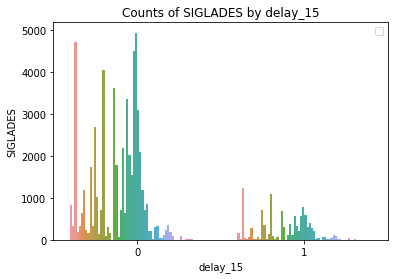

In [18]:
sns.countplot(x='delay_15', hue='SIGLADES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('SIGLADES')
plt.title('Counts of SIGLADES by delay_15')
plt.legend(labels=[])
plt.show()

There are specific cities that have an influence on the delay.

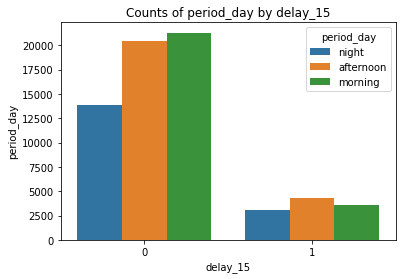

In [19]:
sns.countplot(x='delay_15', hue='period_day', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('period_day')
plt.title('Counts of period_day by delay_15')
plt.show()

Delays usually occur in the afternoon or nights with the follow ratio Ratio Referring to period day night delay:
0.20002305741295826
Ratio referring to period day afternoon delay:
0.19940406178938289
Ratio referring to period day morning delay:
0.16007258096327562

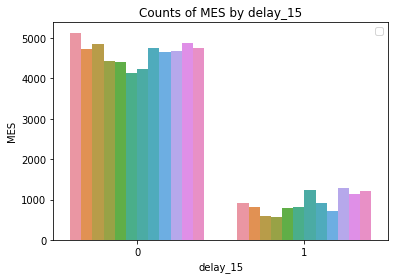

In [20]:
sns.countplot(x='delay_15', hue='MES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('MES')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the month, it does provide information regarding the delay and it can be assimilated as that in holidays dates (December or July) there are considerable delays.

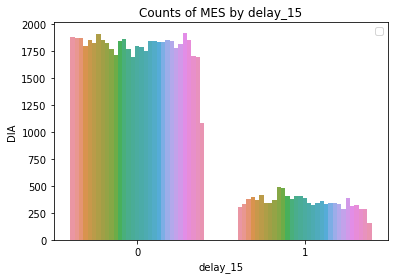

In [21]:
sns.countplot(x='delay_15', hue='DIA', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIA')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the day, it does not provide much information and there is an uniform distribution.

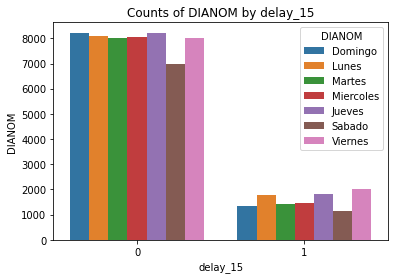

In [22]:
sns.countplot(x='delay_15', hue='DIANOM', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIANOM')
plt.title('Counts of DIANOM by delay_15')
plt.show()

It is interesting the afluent on saturday is lower than the rest of the days and in sunday looks like there is better chances to have a delay.

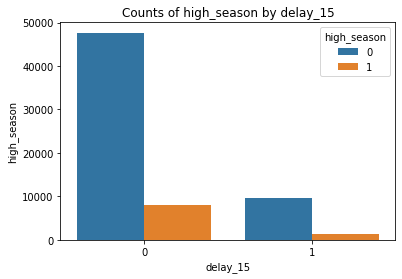

In [23]:
sns.countplot(x='delay_15', hue='high_season', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('high_season')
plt.title('Counts of high_season by delay_15')
plt.show()

Ratio referring to high season (1) and delay:
0.24372384937238495
Ratio referring to low season (0) and delay:
0.17422732236648233

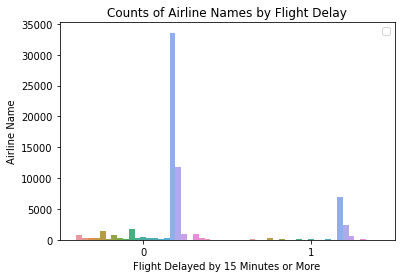

In [24]:
sns.countplot(x='delay_15', hue='OPERA', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('Airline Name')
plt.title('Counts of Airline Names by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())
plt.legend(labels=[])


plt.show() 

Not much information on other flights mostly representing latam and sky airline.

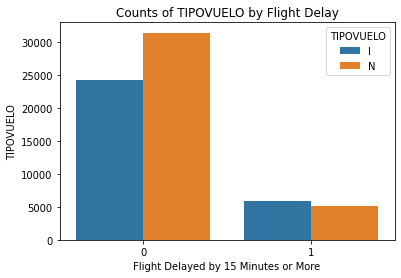

In [25]:
sns.countplot(x='delay_15', hue='TIPOVUELO', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('TIPOVUELO')
plt.title('Counts of TIPOVUELO by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())



plt.show() 

International flights are more prone to delays. But nothing conclusive.

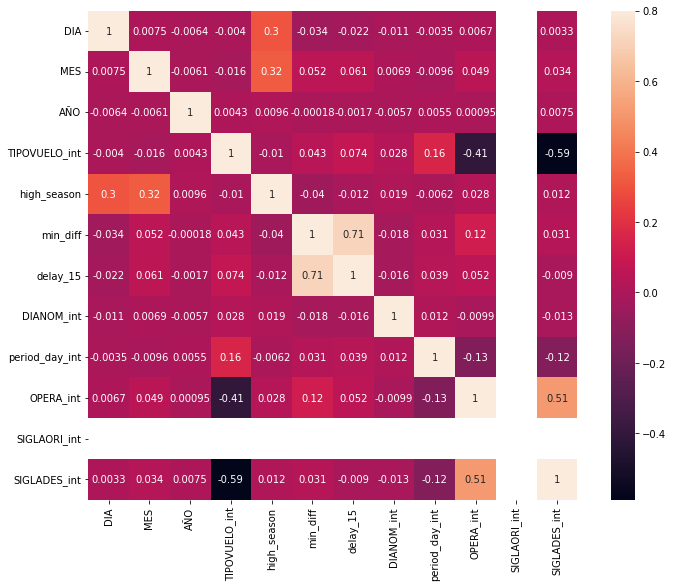

In [26]:
import plotly.graph_objs as go
import plotly.offline as pyoff
import seaborn as sns

corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [27]:
df['SIGLAORI_int']

0        0
1        0
2        0
3        0
4        0
        ..
66573    0
66574    0
66575    0
66576    0
66577    0
Name: SIGLAORI_int, Length: 66578, dtype: int64

#3.- Predictive model

# Prepare the data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66578 entries, 0 to 66577
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         66578 non-null  object        
 1   Vlo-I           66578 non-null  object        
 2   Ori-I           66578 non-null  object        
 3   Des-I           66578 non-null  object        
 4   Emp-I           66578 non-null  object        
 5   Fecha-O         66578 non-null  object        
 6   Vlo-O           66578 non-null  object        
 7   Ori-O           66578 non-null  object        
 8   Des-O           66578 non-null  object        
 9   Emp-O           66578 non-null  object        
 10  DIA             66578 non-null  int64         
 11  MES             66578 non-null  int64         
 12  AÑO             66578 non-null  int64         
 13  DIANOM          66578 non-null  object        
 14  TIPOVUELO       66578 non-null  object        
 15  OP

In [29]:
# Select columns only numericals
df_m = df.iloc[:,[10,11,12,18,20,22,24,25,26,27,28,29]]
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66578 entries, 0 to 66577
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DIA             66578 non-null  int64  
 1   MES             66578 non-null  int64  
 2   AÑO             66578 non-null  int64  
 3   TIPOVUELO_int   66578 non-null  int64  
 4   high_season     66578 non-null  int64  
 5   min_diff        66578 non-null  float64
 6   delay_15        66578 non-null  int64  
 7   DIANOM_int      66578 non-null  int64  
 8   period_day_int  66578 non-null  int64  
 9   OPERA_int       66578 non-null  int64  
 10  SIGLAORI_int    66578 non-null  int64  
 11  SIGLADES_int    66578 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.1 MB


In [30]:
from sklearn.preprocessing import MinMaxScaler

# select numerical columns using iloc and dtypes
numerical_cols = df_m.select_dtypes(include=[np.number]).columns

# create MinMaxScaler instance and fit on numerical columns
scaler = MinMaxScaler()
scaler.fit(df_m[numerical_cols])

# apply transform and add new scaled columns with '_sc' suffix
df_m_scaled = df_m.copy()  # create a copy of the original DataFrame
df_m_scaled.loc[:, numerical_cols] = scaler.transform(df_m[numerical_cols])  # use loc for boolean indexing

# add suffix to column names
new_col_names = [col + '_sc' for col in numerical_cols]
df_m_scaled.columns = list(df_m.columns[:-len(numerical_cols)]) + new_col_names

In [31]:
df_m_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66578 entries, 0 to 66577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIA_sc             66578 non-null  float64
 1   MES_sc             66578 non-null  float64
 2   AÑO_sc             66578 non-null  float64
 3   TIPOVUELO_int_sc   66578 non-null  float64
 4   high_season_sc     66578 non-null  float64
 5   min_diff_sc        66578 non-null  float64
 6   delay_15_sc        66578 non-null  float64
 7   DIANOM_int_sc      66578 non-null  float64
 8   period_day_int_sc  66578 non-null  float64
 9   OPERA_int_sc       66578 non-null  float64
 10  SIGLAORI_int_sc    66578 non-null  float64
 11  SIGLADES_int_sc    66578 non-null  float64
dtypes: float64(12)
memory usage: 6.1 MB


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate the data into X (input features) and y (target variable)

X_cols = list(set(df_m_scaled.columns)-set(['min_diff_sc']))
y_col = ['min_diff_sc']

X = df_m_scaled[X_cols].values
y = df_m_scaled[y_col].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (46604, 11)
y_train shape: (46604, 1)
X_test shape: (19974, 11)
y_test shape: (19974, 1)


# Differents models

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the model
model = LinearRegression(fit_intercept=False, copy_X=False, n_jobs=-1, positive=True)

# Create the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [-1]
}
# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = model.predict(X_test)

# Make predictions and evaluate the model
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
ln_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
ln_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
ln_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
ln_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
print('Best params:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

Root Mean Squared Error for Linear Regression: 0.06588735227662562
Variance score: 0.52
Mape: 619175899591.68
max_error: 0.72
Best params: {'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best score: -0.5167384309932095


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the decision tree regressor model
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

# Define the grid search parameters
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a GridSearchCV object and fit to the training data
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
dt_best = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = dt_best.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
dt_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
dt_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
dt_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
dt_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
print('Best params:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

#Root Mean Squared Error for Linear Regression: 0.06390763348078912
#Variance score: 0.55
#Mape: 544094622945.30
#max_error: 0.74
#Best params: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'splitter': 'random'}
#Best score: -0.5433921721352531

Root Mean Squared Error for Linear Regression: 0.06276533436207934
Variance score: 0.57
Mape: 537898890611.06
max_error: 0.73
Best params: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}
Best score: -0.5434320270925962


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1728 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
430 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _valid

In [37]:
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn import metrics

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
#model = KNeighborsRegressor()

# Define the grid search parameters
#param_grid = {
#    'n_neighbors': [100, 200, 300],
#    'weights': ['uniform', 'distance'],
#    'metric': ['euclidean', 'manhattan', 'chebyshev', 'canberra'],
#    'leaf_size': [20, 30, 40]
#}

# Create a GridSearchCV object and fit to the training data
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Use the best hyperparameters to create the model
#best_model = grid_search.best_estimator_

# Evaluate the model using various metrics
#y_pred = best_model.predict(X_test)
#print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#kn_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
#kn_e2= (metrics.r2_score(y_test, y_pred))
#print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
#kn_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
#print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
#kn_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

#Root Mean Squared Error for Linear Regression: 0.063890948041988
#Variance score: 0.55
#Mape: 620469750833.88
#max_error: 0.71
#Best params: {'leaf_size': 40, 'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'uniform'}
#Best score: -0.5381708945834038

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with the best hyperparameters
best_model = KNeighborsRegressor(n_neighbors=100, weights='uniform', metric='manhattan', leaf_size=40)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model using various metrics
y_pred = best_model.predict(X_test)
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
kn_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
kn_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
kn_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
kn_e4= (metrics.max_error(y_test, y_pred))


Root Mean Squared Error for Linear Regression: 0.0638869513656006
Variance score: 0.55
Mape: 620720992284.14
max_error: 0.71


In [ ]:
#import xgboost as xgb
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, max_error, r2_score

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=40, max_depth= 500, 
#                             eta = 0.2, min_child_weight=1, alpha= 5, num_parallel_tree= 5)

# Define the grid search parameters
#param_grid = {
#    'max_depth': [3, 5, 7, 10],
#    'min_child_weight': [1, 3, 5],
#    'subsample': [0.6, 0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0],
#    'learning_rate': [0.1, 0.01, 0.001]
#}

# Create a GridSearchCV object and fit to the training data
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Print the best hyperparameters
#print('Best params:', grid_search.best_params_)

# Make predictions on the test set using the best model
#best_xgb_model = grid_search.best_estimator_
#y_pred = best_xgb_model.predict(X_test)

# Compute the evaluation metrics for the best model
#print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#xgb_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
#xgb_e2= (metrics.r2_score(y_test, y_pred))
#print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
#xgb_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
#print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
#xgb_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

#Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1.0}
#Root Mean Squared Error for Linear Regression: 0.0624065238448978
#Variance score: 0.57
#Mape: 562123968452.08
#max_error: 0.73
#Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1.0}
#Best score: -0.5531640844928655

In [39]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, max_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=40, max_depth=7, min_child_weight=1, 
                                  subsample=0.8, colsample_bytree=0.6, learning_rate=0.1, num_parallel_tree=5)

# Fit the model to the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Compute the evaluation metrics for the best model
print('Root Mean Squared Error for XGBoost:', np.sqrt(mean_squared_error(y_test, y_pred)))
xgb_e1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (r2_score(y_test, y_pred)))
xgb_e2 = r2_score(y_test, y_pred)
print('Mape: %.2f' % (mean_absolute_percentage_error(y_test, y_pred)))
xgb_e3 = mean_absolute_percentage_error(y_test, y_pred)
print('max_error: %.2f' % (max_error(y_test, y_pred)))
xgb_e4 = max_error(y_test, y_pred)

Root Mean Squared Error for XGBoost: 0.061786077332819274
Variance score: 0.58
Mape: 535834050821.20
max_error: 0.72


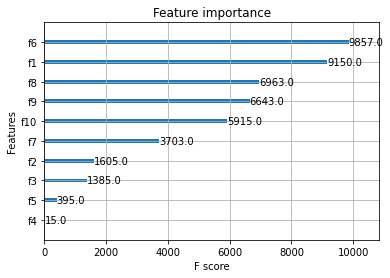

In [42]:
# Plot the feature importances
xgb.plot_importance(best_xgb_model)
plt.show()

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
nn_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
nn_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
nn_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
nn_e4= (metrics.max_error(y_test, y_pred))



Epoch 1/100
1665/1665 [==============================] - 4s 2ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2/100
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3/100
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/100
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 5/100
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6/100
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7/100
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8/100
1665/1665 [==============================] 

In [44]:
# Import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# Create the model using the best hyperparameters
model = create_model()

# Train the model on the full training set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
nn2_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
nn2_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
nn2_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
nn2_e4= (metrics.max_error(y_test, y_pred))



Epoch 1/50
1665/1665 [==============================] - 4s 2ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2/50
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3/50
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4/50
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 5/50
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6/50
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 7/50
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 8/50
1665/1665 [==============================] - 3s 2ms

Code used to find the params for nn model.

In [ ]:
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
#def create_model(activation='relu', neurons=64, dropout_rate=0.5):
#    model = Sequential()
#    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(neurons//2, activation=activation))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(1))
#    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#    return model

# Create a KerasRegressor object for use in GridSearchCV
#model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
#param_grid = {
#    'activation': ['relu', 'tanh', 'sigmoid'],
#    'neurons': [32, 64, 128],
#    'dropout_rate': [0.2, 0.5, 0.8]
#}

# Create a GridSearchCV object and fit to the training data
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

Code used to find the params for svr model

In [ ]:
#from sklearn.svm import SVR
#from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'gamma': [0.01, 0.1, 1, 'scale'],
#    'kernel': ['linear', 'rbf', 'poly']
#}

# Create a GridSearchCV object and fit to the training data
#svr = SVR()
#grid_search = GridSearchCV(svr, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

#Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
#Best score: -0.5193479380405777

In [54]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVR model with the best hyperparameters
svr = SVR(kernel='rbf', C=10, gamma=0.01)
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
svr_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
svr_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
svr_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
svr_e4= (metrics.max_error(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Root Mean Squared Error for Linear Regression: 0.06572796535957696
Variance score: 0.53
Mape: 613380350823.26
max_error: 0.72


#Stack model

First we going to analize differents metrics of every model.

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize the error arrays
dt_error = [dt_e1, dt_e2, dt_e3, dt_e4]
xgb_error = [xgb_e1, xgb_e2, xgb_e3, xgb_e4]
nn_error = [nn_e1, nn_e2, nn_e3, nn_e4]
ln_error = [ln_e1, ln_e2, ln_e3, ln_e4]
nn2_error = [nn2_e1, nn2_e2, nn2_e3, nn2_e4]
svr_error = [svr_e1, svr_e2, svr_e3, svr_e4]

# Calculate the mean of each error metric
rmse = [np.mean(dt_error), np.mean(xgb_error), np.mean(nn_error), np.mean(ln_error), np.mean(nn2_error), np.mean(svr_error)]
variance_score = [np.mean(dt_e2), np.mean(xgb_e2), np.mean(nn_e2), np.mean(ln_e2), np.mean(nn2_e2), np.mean(svr_e2)]
mape = [np.mean(dt_e3), np.mean(xgb_e3), np.mean(nn_e3), np.mean(ln_e3), np.mean(nn2_e3), np.mean(svr_e3)]
max_error = [np.mean(dt_e4), np.mean(xgb_e4), np.mean(nn_e4), np.mean(ln_e4), np.mean(nn2_e4), np.mean(svr_e4)]

# Plot the error metrics for each model
labels = ['Decision Tree', 'XGBoost', 'Neural Network', 'Linear Regression', 'Neural Network 2', 'SVR']

# RMSE and MAPE plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, rmse, width, label='RMSE')
plt.bar(x + width/2, mape, width, label='MAPE')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('RMSE and MAPE Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Variance score and Max Error plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, r2, width, label='Variance score')
plt.bar(x + width/2, max_error, width, label='Max Error')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('Variance score and Max Error Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Print the mean of each metric
print('Mean RMSE:', np.mean(rmse))
print('Mean Variance Score:', np.mean(variance_score))
print('Mean MAPE:', np.mean(mape))
print('Mean Max Error:', np.mean(max_error))

In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the base models
estimators = [('xgb', XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=1.0)),
              ('svr', SVR(C=1, gamma=0.1, kernel='rbf')),
              ('dt', DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter='random'))]

# Initialize the stacking model
stack_model = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
stack_e1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
stack_e2 = (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
stack_e3 = (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
stack_e4 = (metrics.max_error(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Root Mean Squared Error: 0.06738317392241182
Variance score: 0.51
Mape: 432193687651.20
max_error: 0.78


Let's try to find the best params via gridsearch and using xgb model to ensamble.




In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the base models
estimators = [('xgb', XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=1.0)),
              ('svr', SVR(C=1, gamma=0.1, kernel='rbf')),
              ('dt', DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter='random'))]

# Set the parameter grid for XGBoost
xgb_params = {'xgb__learning_rate': [0.01, 0.1, 0.5],
              'xgb__max_depth': [3, 5, 10],
              'xgb__subsample': [0.5, 0.8, 1.0],
              'xgb__colsample_bytree': [0.5, 0.8, 1.0]}

# Initialize the stacking model
stack_model = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Initialize the grid search object
grid_search = GridSearchCV(stack_model, param_grid={'xgb__learning_rate': [0.01, 0.1, 0.5],
                                                    'xgb__max_depth': [3, 5, 10],
                                                    'xgb__subsample': [0.5, 0.8, 1.0],
                                                    'xgb__colsample_bytree': [0.5, 0.8, 1.0]}, cv=5, scoring='neg_mean_squared_error')

# Train the stacking model with grid search
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
stack_e1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
stack_e2 = (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
stack_e3 = (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
stack_e4 = (metrics.max_error(y_test, y_pred)) 



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize the error arrays
dt_error = [dt_e1, dt_e2, dt_e3, dt_e4]
xgb_error = [xgb_e1, xgb_e2, xgb_e3, xgb_e4]
svr_error = [svr_e1, svr_e2, svr_e3, svr_e4]
stack_error = [stack_e1, stack_e2, stack_e3, stack_e4]

# Calculate the mean of each error metric
rmse = [np.mean(dt_error), np.mean(xgb_error), np.mean(svr_error), np.mean(stack_error)]
variance_score = [np.mean(dt_e2), np.mean(xgb_e2), np.mean(svr_e2), np.mean(stack_e2)]
mape = [np.mean(dt_e3), np.mean(xgb_e3), np.mean(svr_e3), np.mean(stack_e3)]
max_error = [np.mean(dt_e4), np.mean(xgb_e4), np.mean(svr_e4), np.mean(stack_e4)]

# Plot the error metrics for each model
labels = ['Decision Tree', 'XGBoost', 'SVR', 'Stacking']

# RMSE and MAPE plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, rmse, width, label='RMSE')
plt.bar(x + width/2, mape, width, label='MAPE')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('RMSE and MAPE Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# variance score and Max Error plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, variance_score, width, label='Variance score')
plt.bar(x + width/2, max_error, width, label='Max Error')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('Variance score and Max Error Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Print the mean of each metric
print('Mean RMSE:', np.mean(rmse))
print('Mean Variance Score:', np.mean(variance_score))
print('Mean MAPE:', np.mean(mape))
print('Mean Max Error:', np.mean(max_error))



# 4.- Results

#5.- Comments

recommendations to improve the model for predicting delays in airplane takeoff and landing:

Add weather information: Weather can have a significant impact on flight delays, so incorporating weather data into the model can help improve its accuracy. Factors such as temperature, precipitation, wind speed, and cloud cover can all affect flight operations.

Include additional variables: Adding variables such as gate location, flight distance, online boarding, baggage handling, inflight wifi service, satisfaction, customer type, and gender can provide more information about the factors that contribute to flight delays. This can help the model identify patterns and relationships that may not be captured by the existing variables.

Manage outliers: Outliers can have a significant impact on model performance, so it is important to identify and manage them appropriately. This can involve removing outliers or transforming the data to reduce their impact.

Use more data: Using more data beyond just the 2017 dataset can provide a more comprehensive understanding of the problem and help the model identify more patterns and relationships. This can lead to better accuracy and generalization of the model.

Optimize execution time: As the size of the dataset and complexity of the model increases, it may become necessary to optimize the execution time of the model. This can involve techniques such as parallel processing, distributed computing, or using more efficient algorithms.

Overall, these recommendations can help improve the accuracy and generalization of the model for predicting delays in airplane takeoff and landing. By incorporating more variables, managing outliers, using more data, and optimizing execution time, the model can better capture the factors that contribute to flight delays and provide more accurate predictions.





In the paper "Flight delay prediction based on deep learning and Levenberg-Marquart algorithm", the Levenberg-Marquardt algorithm is used as an optimization algorithm for training the neural network. Specifically, the algorithm is used to minimize the mean squared error between the predicted and actual flight delay values.

The Levenberg-Marquardt algorithm is a commonly used optimization algorithm for training neural networks. It combines the steepest descent method with a trust region approach to achieve fast convergence to a local minimum of the objective function. It is particularly well-suited for solving nonlinear least squares problems, which makes it a popular choice for training neural networks.